<h1><center><u><i><font color="red">LetsGrowMore - Data Science Internship</color></u></i></center></h1>
<h2><center><i><font color="blue">Author: Tanushree B S</font></center></i></h2>
<hr></hr>
<h2><center>TASK 7: Develop A Neural Network That Can Read Handwriting</center></h2>
<h2><center>ADVANCED LEVEL</center></h2>

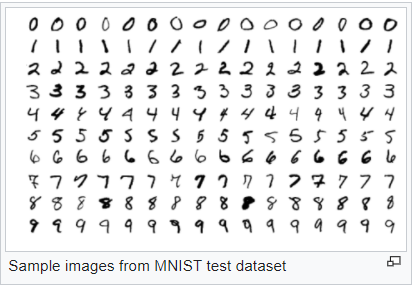

# PROBLEM STATEMENT

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

# MNIST Handwritten Digit Classification Dataset

- The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

- It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

- The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

# Importing the required libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

# Loading the MNSIT dataset from keras

In [3]:
# example of loading the mnist dataset
from keras.datasets import mnist
# load dataset
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [4]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


#### We can see that there are 60,000 examples in the training dataset and 10,000 in the test dataset and that images are indeed square with 28×28 pixels.

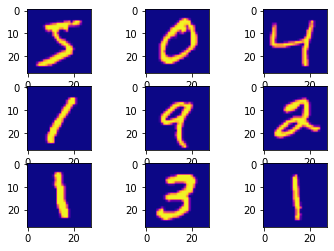

In [5]:
# plot first few images
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('plasma'))

#### A plot of the first nine images in the dataset is also created showing the natural handwritten nature of the images to be classified.

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

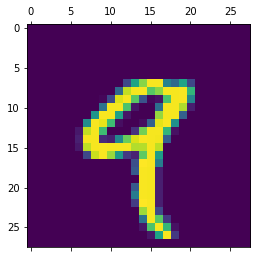

In [7]:
plt.matshow(X_train[4])

In [8]:
y_train[4]

9

#### As the pixel intensities are currently between the range of 0 and 255, we proceed to normalize the features by dividing 255

# Data cleaning, normalisation and cleaning

## Prepare Pixel data

We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Model fitting

We proceed by fitting several simple neural network models using Keras (with TensorFlow as our backend) and collect their accuracy. The model that performs the best on the validation set will be used as the model of choice for the competition.

### Model 1: Very simple neural network with no hidden layers

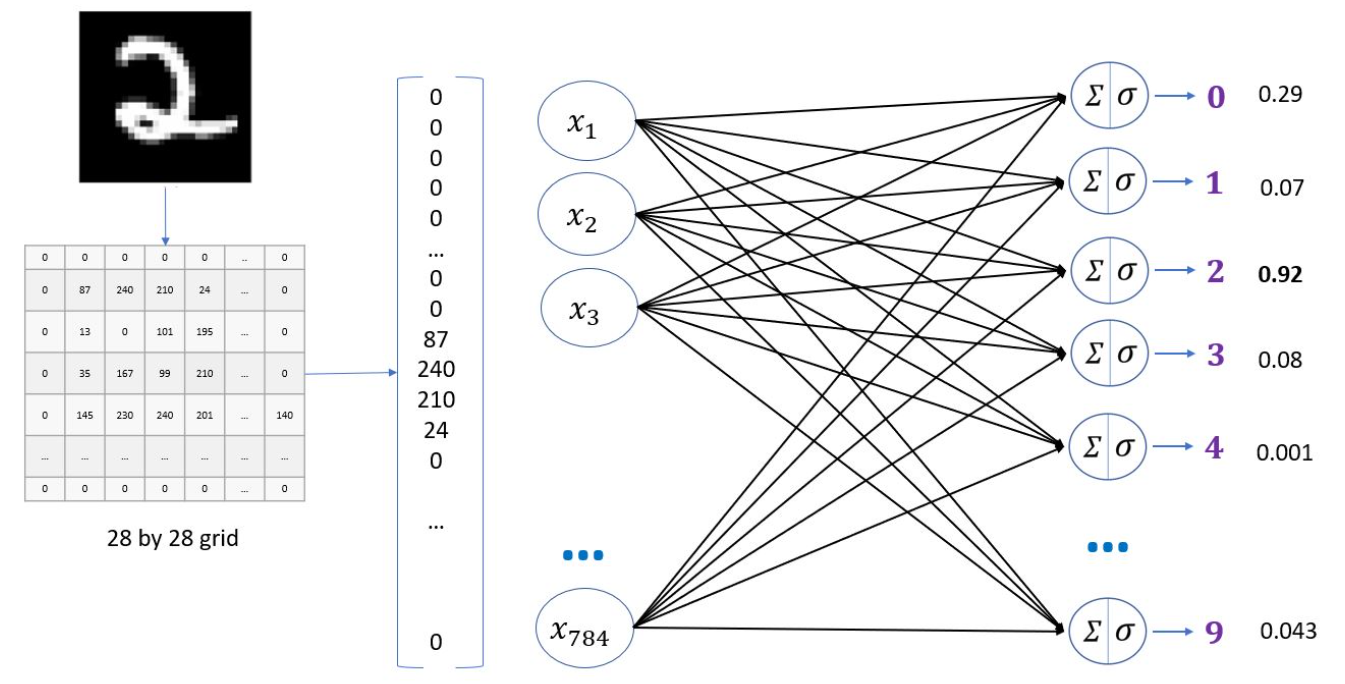

In [15]:
model1 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 865us/step - loss: 0.4703 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 2s 973us/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 804us/step - loss: 0.2833 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 739us/step - loss: 0.2666 - accuracy: 0.9254


In [16]:
model1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 593us/step - loss: 0.2647 - accuracy: 0.9260


[0.26465362310409546, 0.9259999990463257]

In [17]:
y_predicted = model1.predict(X_test_flattened)
y_predicted[3]

array([9.9868506e-01, 2.8085353e-08, 1.6320068e-01, 6.4592063e-03,
       4.5942146e-05, 1.1679667e-01, 1.0928649e-01, 9.1270804e-03,
       3.0444771e-02, 1.5612155e-02], dtype=float32)

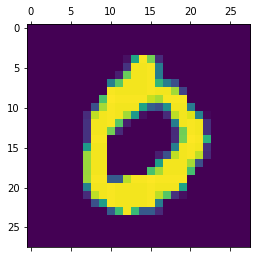

In [18]:
plt.matshow(X_test[3])

#### np.argmax finds a maximum element from an array and returns the index of it

In [19]:
np.argmax(y_predicted[3])

0

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    2,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  936,   14,    6,    3,   12,    9,   36,    4],
       [   1,    0,   23,  925,    0,   22,    2,    9,   21,    7],
       [   1,    1,    5,    2,  920,    0,   10,    4,   11,   28],
       [   8,    3,    4,   37,    8,  771,   13,    4,   38,    6],
       [   8,    3,    8,    1,    7,   12,  913,    2,    4,    0],
       [   1,    5,   25,    9,    8,    0,    0,  948,    4,   28],
       [   4,   10,    6,   24,    9,   24,    8,   10,  875,    4],
       [  10,    7,    1,   13,   35,    6,    0,   27,   12,  898]])>

Text(69.0, 0.5, 'Truth')

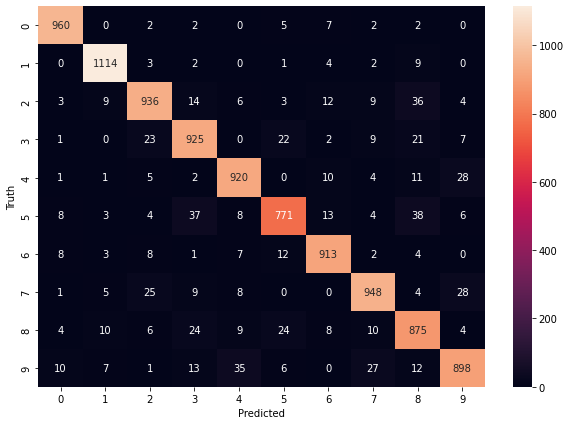

In [23]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### We saw that without using hidden layers, we got an accuracy of 92%

### Model 2 : Using simple neural network with 1 layer

In [24]:
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2738 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1220 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0870 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0528 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0438 - accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0297 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0248 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.019

In [25]:
model2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 721us/step - loss: 0.0915 - accuracy: 0.9761


[0.09154398739337921, 0.9761000275611877]

#### Here, we got an accuracy of 97% in the validation test set

### Model 3 : Using simple neural network with 3 layer

In [30]:
model3 = keras.Sequential([
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(300, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2114 - accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0911 - accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0645 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0514 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0404 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0353 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0295 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0271 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0208 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - lo

In [31]:
model3.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0793 - accuracy: 0.9817


[0.07934267073869705, 0.9817000031471252]

Text(69.0, 0.5, 'Truth')

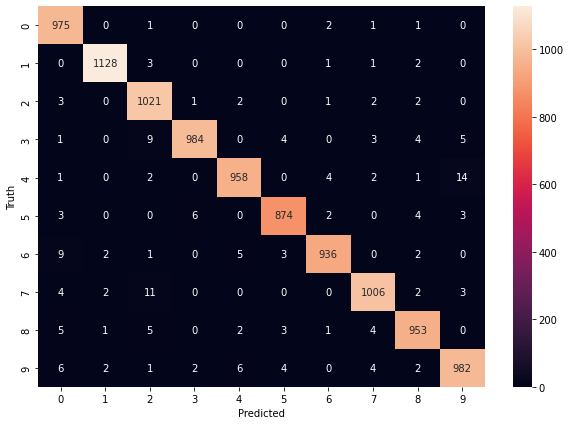

In [32]:
y_predicted = model3.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Here, we got an accuracy of 98.17% in the validation test set
